# Heart attack possibility

# About data set

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [8]:
df =pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

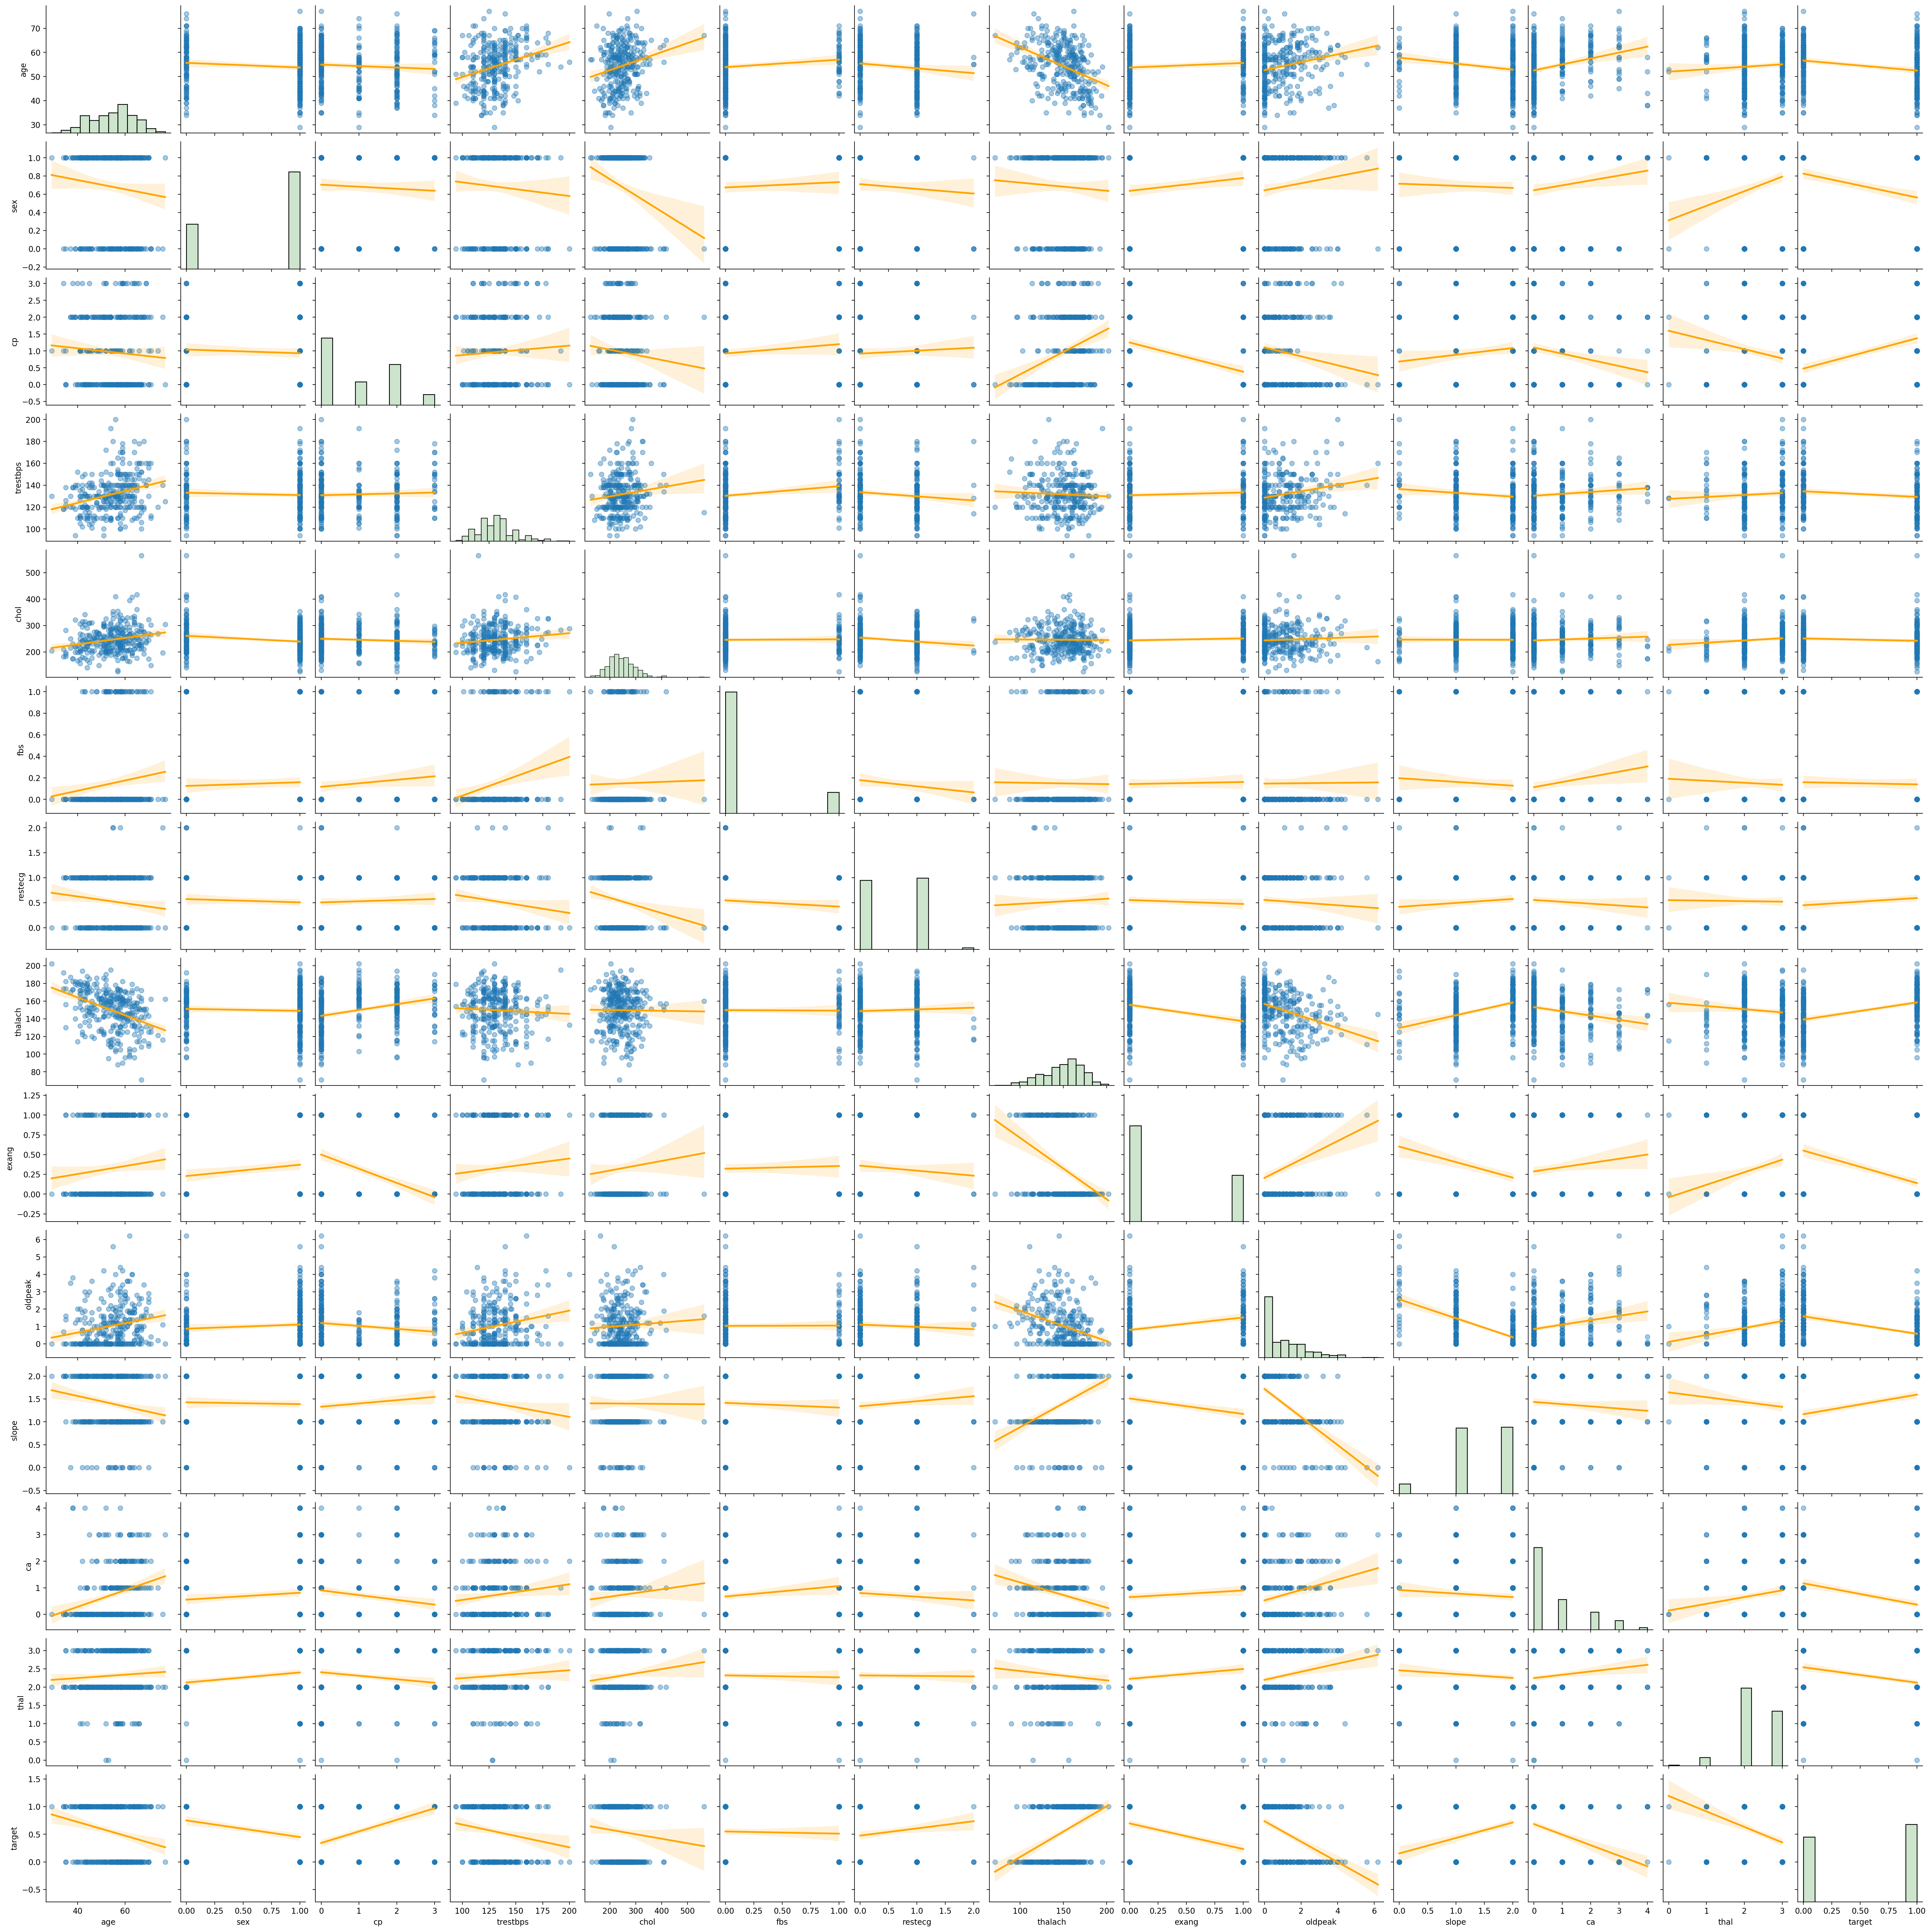

In [6]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
             'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2}
             )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# model= DecisionTreeClassifier(random_state=7)
model = RandomForestClassifier(n_estimators=250, random_state=7)
# model = ExtraTreesClassifier(n_estimators=250, random_state=7)
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df['target']
model.fit(X,y)

RandomForestClassifier(n_estimators=250, random_state=7)

In [7]:
model.feature_importances_

array([0.0872825 , 0.03252724, 0.1289986 , 0.0737229 , 0.07617843,
       0.00990812, 0.02095878, 0.12439902, 0.06162403, 0.10246892,
       0.05542255, 0.12629209, 0.10021682])

In [9]:
fs=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs

fbs         0.009908
restecg     0.020959
sex         0.032527
slope       0.055423
exang       0.061624
trestbps    0.073723
chol        0.076178
age         0.087282
thal        0.100217
oldpeak     0.102469
thalach     0.124399
ca          0.126292
cp          0.128999
dtype: float64

In [10]:
fs.sum()

1.0

<Axes: >

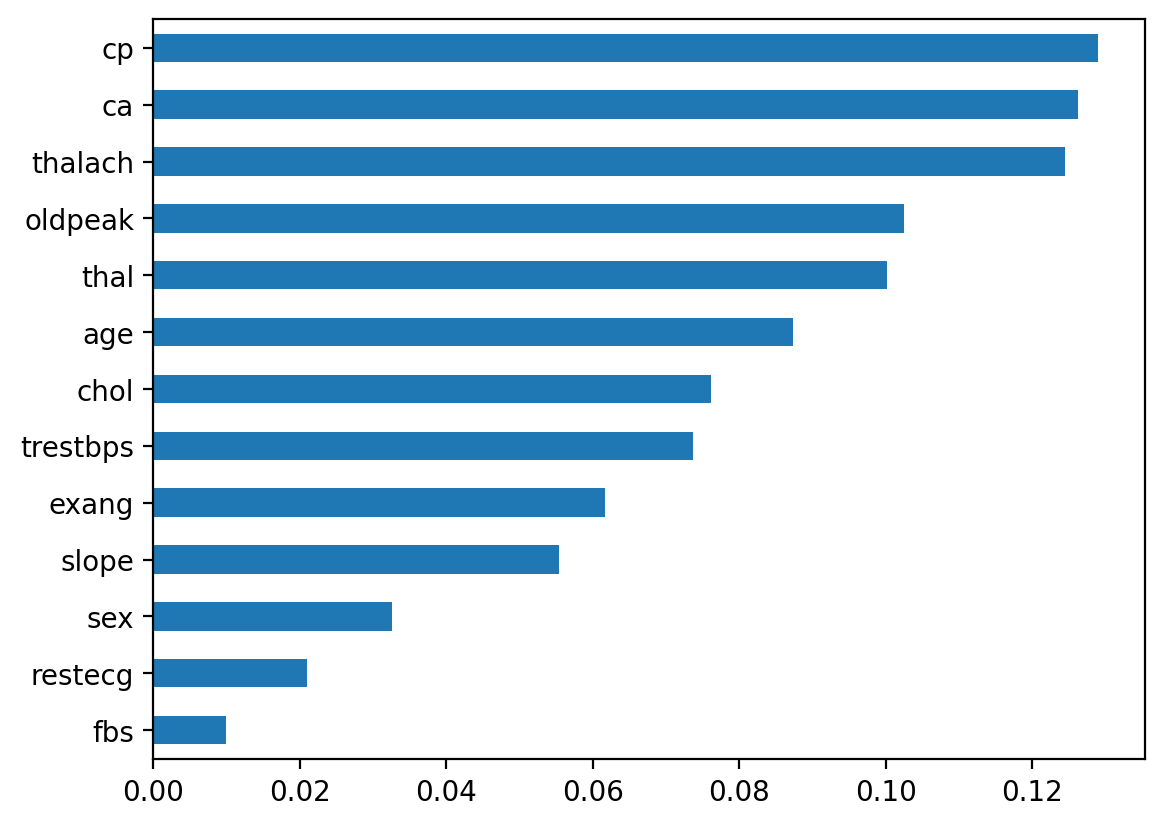

In [11]:
fs.plot(kind='barh')

In [12]:
fs[fs>.1]

thal       0.100217
oldpeak    0.102469
thalach    0.124399
ca         0.126292
cp         0.128999
dtype: float64

In [14]:
fs.nlargest(5)

cp         0.128999
ca         0.126292
thalach    0.124399
oldpeak    0.102469
thal       0.100217
dtype: float64

In [15]:
fs[fs > .1].index

Index(['thal', 'oldpeak', 'thalach', 'ca', 'cp'], dtype='object')

# Attribute Information

(cp) = chest pain type (4 values)

(ca) number of major vessels (0-3) colored by flourosopy

(thalach) maximum heart rate achieved

(oldpeak) oldpeak = ST depression induced by exercise relative to rest

(thal) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [24]:
X=df
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [25]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    random_state=7)

In [26]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores)
print(f'best score = {max(model_scores)}')

KNeighborsClassifier score: 0.6264
[[26 15]
 [19 31]]
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        41
           1       0.67      0.62      0.65        50

    accuracy                           0.63        91
   macro avg       0.63      0.63      0.63        91
weighted avg       0.63      0.63      0.63        91

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 1.0000
[[41  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

----------------------------------------------------------------------------------------------------
Perceptron           score: 0.6374
[

C:\Users\ouch.bros\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier score: 1.0000
[[41  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

----------------------------------------------------------------------------------------------------
BaggingClassifier    score: 1.0000
[[41  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

----------------------------------------------------------------------------------------------------
AdaBoostClassifier   score: 1.0000

C:\Users\ouch.bros\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier        score: 0.8681
[[36  5]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

----------------------------------------------------------------------------------------------------
SVC_linear           score: 1.0000
[[41  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

----------------------------------------------------------------------------------------------------
GaussianProcessClassifier score: 0.5

In [27]:
sorted_array_by_rows = sorted(model_scores, key=lambda x: x[0], reverse=True)
sorted_array_by_rows

[[1.0, 'LogisticRegression'],
 [1.0, 'DecisionTreeClassifier'],
 [1.0, 'GradientBoostingClassifier'],
 [1.0, 'RandomForestClassifier'],
 [1.0, 'BaggingClassifier'],
 [1.0, 'AdaBoostClassifier'],
 [1.0, 'GaussianNB'],
 [1.0, 'SVC_linear'],
 [0.8681318681318682, 'MLPClassifier'],
 [0.6373626373626373, 'Perceptron'],
 [0.6263736263736264, 'KNeighborsClassifier'],
 [0.5824175824175825, 'GaussianProcessClassifier']]